In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\varun\\Downloads\\emp_promotion.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# EDA

Text(0, 0.5, 'Departments')

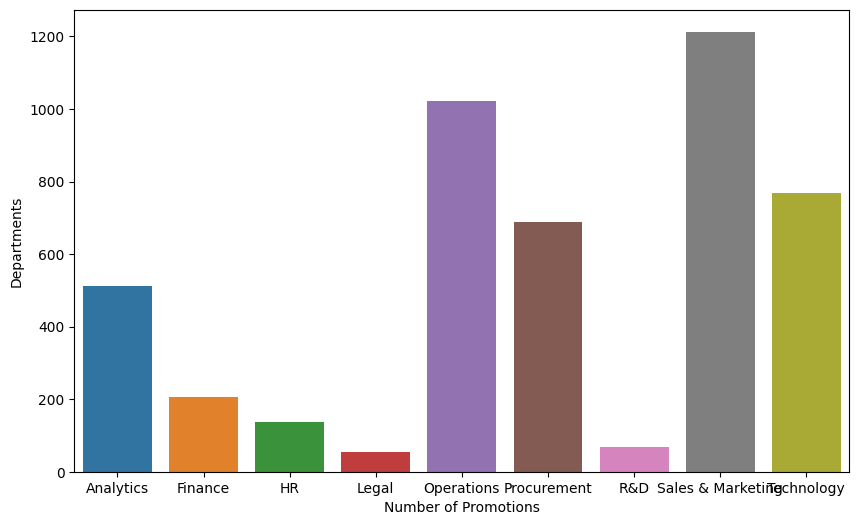

In [43]:
dept=df.groupby('department')['is_promoted'].sum()
dept=dept.to_frame().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='department',y='is_promoted',data=dept)
plt.xlabel('Number of Promotions')
plt.ylabel('Departments')

Text(0, 0.5, 'Regions')

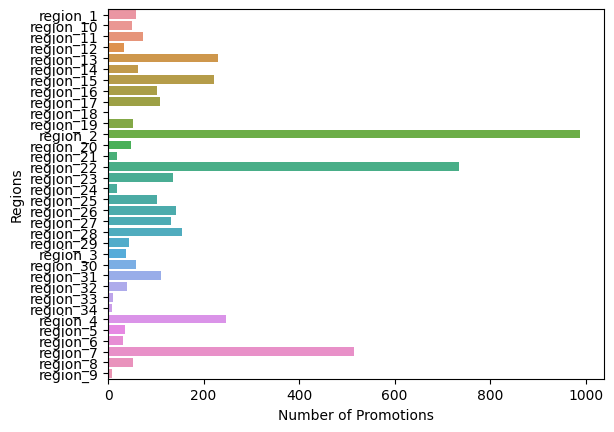

In [44]:
reg=df.groupby('region')['is_promoted'].sum()
reg=reg.to_frame().reset_index()
sns.barplot(y='region', x='is_promoted', data=reg, orient='h')
plt.xlabel('Number of Promotions')
plt.ylabel('Regions')

<Figure size 1000x600 with 0 Axes>

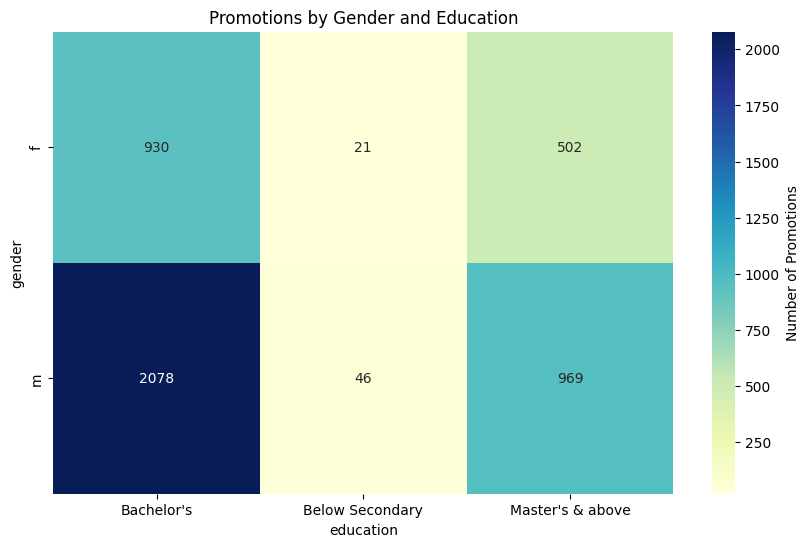

Text(0.5, 1.0, 'Gender Distribution')

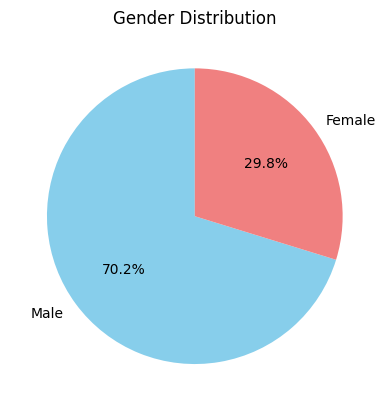

In [41]:
gen=df.groupby(['gender','education'])['is_promoted'].sum()
gen=gen.to_frame().reset_index()
plt.figure(figsize=(10, 6))
heatmap_data = gen.pivot(index='gender', columns='education', values='is_promoted')
plt.figure(figsize=(10, 6))
heatmap_data = gen.pivot(index='gender', columns='education', values='is_promoted')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Number of Promotions'})
plt.title('Promotions by Gender and Education')
plt.show()

count=df.value_counts('gender').to_list()
count

plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')

In [181]:
df.shape

(54808, 14)

In [182]:
print(df.info())
print('')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None



,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Null Detection

In [183]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Cleaning the dataset

In [184]:
#replace null values
mod=df['education'].mode()[0]#THis zero only gives
mod

"Bachelor's"

In [185]:
#categorical
df['education'].fillna(mod,inplace=True)
df.isna().sum()


employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [186]:
#Non categorical---using mean
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(),inplace=True)
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

<Axes: >

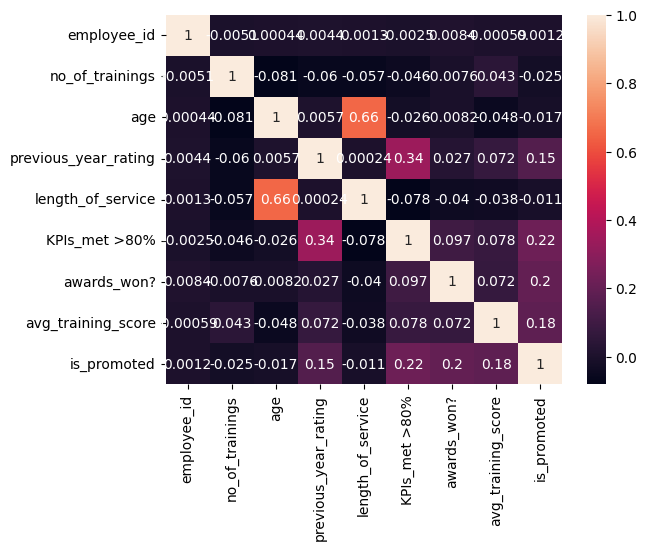

In [187]:
#Correlation
cr=df.corr(numeric_only=True)
plt.Figure(figsize=(12,12))
sns.heatmap(cr,annot=True)

In [188]:
df.corr(numeric_only=True).is_promoted.sort_values(ascending=False)

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.153406
employee_id             0.001206
length_of_service      -0.010670
age                    -0.017166
no_of_trainings        -0.024896
Name: is_promoted, dtype: float64

# Outlier detection

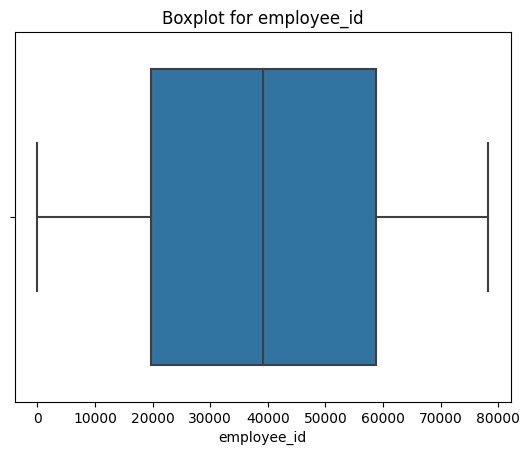

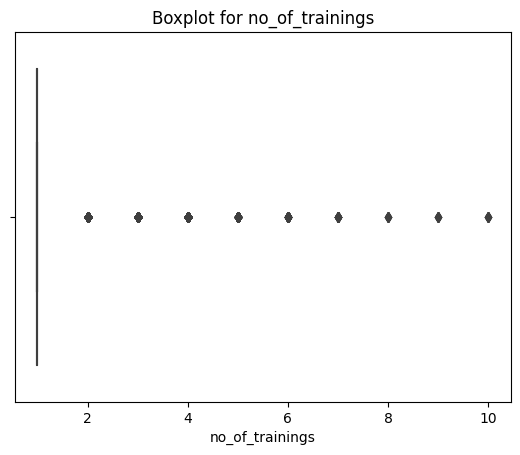

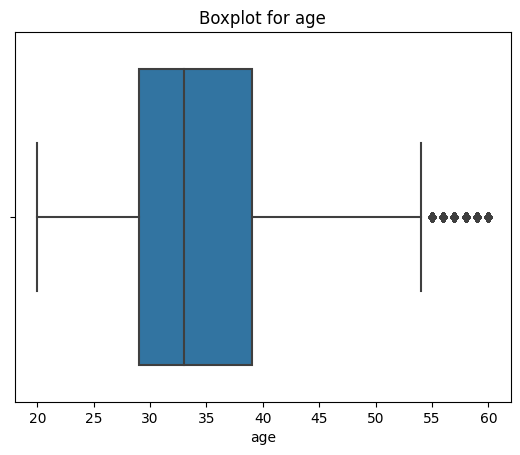

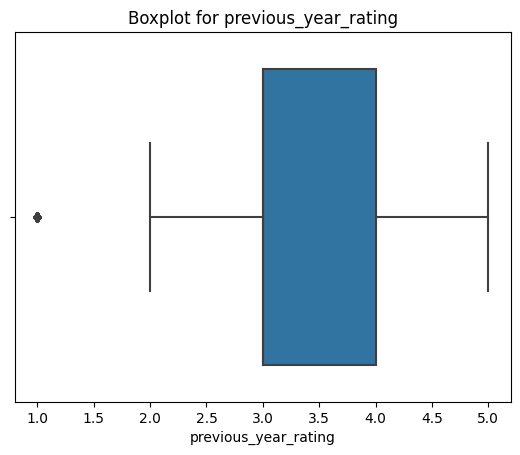

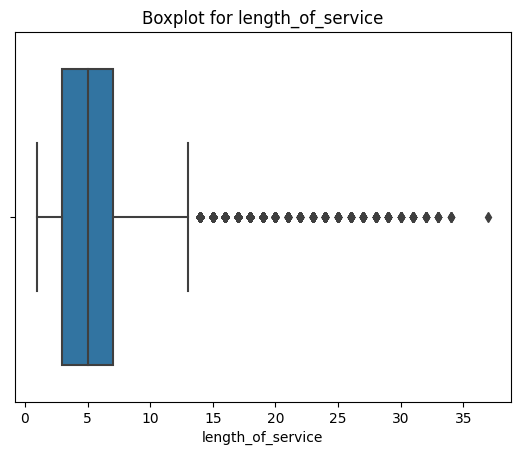

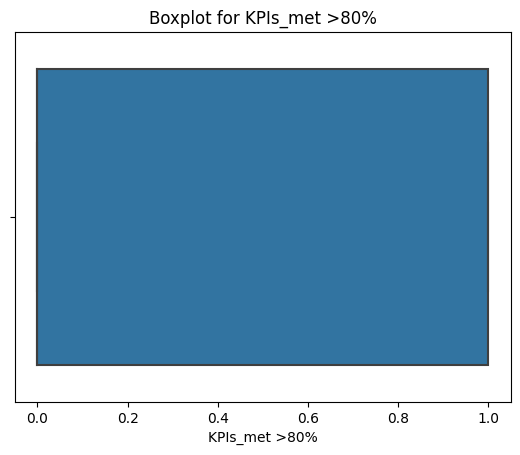

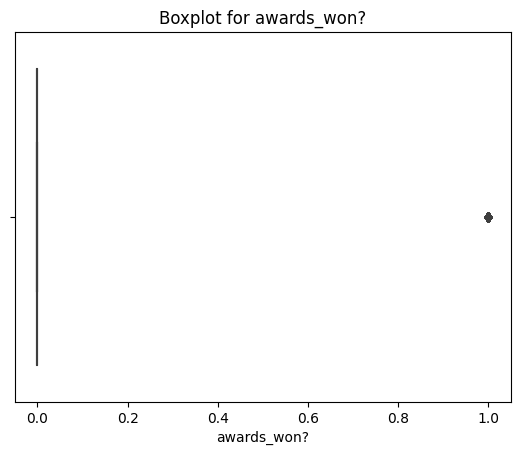

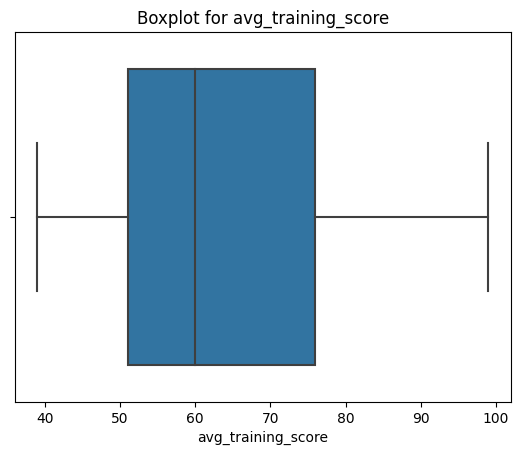

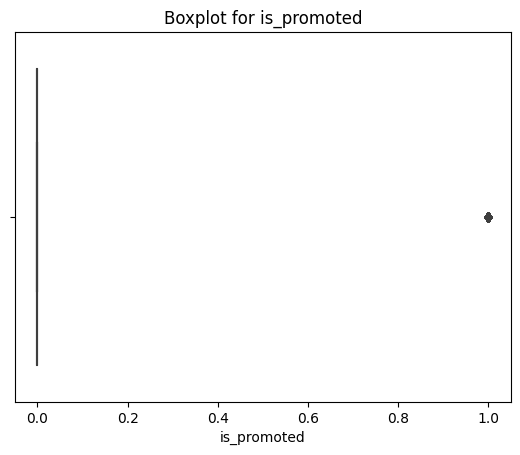

In [189]:
non_categorical_columns = df.select_dtypes(exclude=['object'])
for column in non_categorical_columns.columns:
    sns.boxplot(data=df,x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()
    

# Encoding

In [190]:
from sklearn.preprocessing import LabelEncoder #for project building we need to initialize the label encoder for n # times for n categorical columns
le=LabelEncoder()
non_categorical_columns = df.select_dtypes(include=['object'])
for column in non_categorical_columns.columns:
    df[column]=le.fit_transform(df[column])
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,0,45,0


# X and Y declaration

In [191]:
x=df.drop(columns=['employee_id','is_promoted'])
x

y=df['is_promoted']
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

# Train/Test split

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)


# Model Definition

In [193]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [194]:
pred=model.predict(x_test)
pred_prob=model.predict_proba(x_test)

# Evaluation

In [195]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
print('Accuracy',accuracy_score(y_test,pred))
print('Auc',roc_auc_score(y_test,pred))

Accuracy 0.9217296113847838
Auc 0.5806218369654331


In [196]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10007
           1       0.72      0.17      0.27       955

    accuracy                           0.92     10962
   macro avg       0.82      0.58      0.62     10962
weighted avg       0.91      0.92      0.90     10962



In [197]:
pd.crosstab(y_test,pred)

col_0,0,1
is_promoted,,
0,9944,63
1,795,160
